  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4


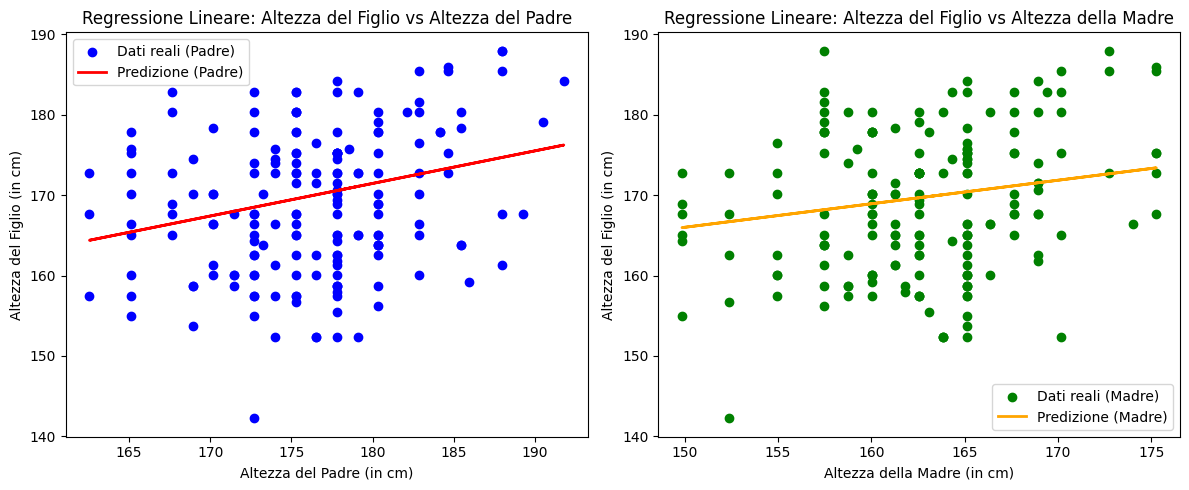

Coefficiente angolare (Padre): 0.40532932888908224
Intercetta (Padre): 98.49626345552937
Coefficiente angolare (Madre): 0.29275463138971997
Intercetta (Madre): 122.08525223176318
R^2 (Padre): 0.05139484750054535
R^2 (Madre): 0.0504196848048305


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Carica il dataset di Galton
data = pd.read_csv('./galton.csv')

# Visualizza le prime righe del dataset
print(data.head())

# Converti le altezze da pollici a centimetri
data['Father'] = data['Father'] * 2.54  # Altezza del padre in cm
data['Mother'] = data['Mother'] * 2.54  # Altezza della madre in cm
data['Height'] = data['Height'] * 2.54   # Altezza del figlio in cm

# Seleziona le colonne di interesse
X_father = data[['Father']]  # Altezza del padre
X_mother = data[['Mother']]   # Altezza della madre
y = data['Height']            # Altezza del figlio

# Suddividi il dataset in un set di addestramento e uno di test
X_train_father, X_test_father, y_train, y_test = train_test_split(X_father, y, test_size=0.2, random_state=42)
X_train_mother, X_test_mother, _, _ = train_test_split(X_mother, y, test_size=0.2, random_state=42)

# Crea il modello di regressione lineare per il padre
model_father = LinearRegression()
model_father.fit(X_train_father, y_train)

# Fai previsioni sul set di test per il padre
y_pred_father = model_father.predict(X_test_father)

# Crea il modello di regressione lineare per la madre
model_mother = LinearRegression()
model_mother.fit(X_train_mother, y_train)

# Fai previsioni sul set di test per la madre
y_pred_mother = model_mother.predict(X_test_mother)

# Grafico per l'altezza del padre e del figlio
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Due grafici in una riga, primo grafico
plt.scatter(X_test_father, y_test, color='blue', label='Dati reali (Padre)')
plt.plot(X_test_father, y_pred_father, color='red', linewidth=2, label='Predizione (Padre)')
plt.title('Regressione Lineare: Altezza del Figlio vs Altezza del Padre')
plt.xlabel('Altezza del Padre (in cm)')
plt.ylabel('Altezza del Figlio (in cm)')
plt.legend()

# Grafico per l'altezza della madre e del figlio
plt.subplot(1, 2, 2)  # Secondo grafico
plt.scatter(X_test_mother, y_test, color='green', label='Dati reali (Madre)')
plt.plot(X_test_mother, y_pred_mother, color='orange', linewidth=2, label='Predizione (Madre)')
plt.title('Regressione Lineare: Altezza del Figlio vs Altezza della Madre')
plt.xlabel('Altezza della Madre (in cm)')
plt.ylabel('Altezza del Figlio (in cm)')
plt.legend()

plt.tight_layout()  # Ottimizza il layout
plt.show()

# Stampa i coefficienti del modello
print(f'Coefficiente angolare (Padre): {model_father.coef_[0]}')
print(f'Intercetta (Padre): {model_father.intercept_}')
print(f'Coefficiente angolare (Madre): {model_mother.coef_[0]}')
print(f'Intercetta (Madre): {model_mother.intercept_}')

# Calcola e stampa il punteggio R^2
r2_score_father = model_father.score(X_test_father, y_test)
r2_score_mother = model_mother.score(X_test_mother, y_test)
print(f'R^2 (Padre): {r2_score_father}')
print(f'R^2 (Madre): {r2_score_mother}')